# Investigate wealth and income in exemplary countries


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

From the given data set options I chose two datasets from the [Gapminder World](https://www.google.com/url?q=http://www.gapminder.org/data/&sa=D&ust=1532469042121000):

* Income per person inflation adjusted and in purchasing power parity [PPP]
* Life expectancy years

To ease the further process the dataframes named and are stored in a dictionary.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read CSV Files, name them and store them in a dictionary
files = {'income' : 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv',
        'life_expectancy': 'life_expectancy_years.csv'}

<a id='wrangling'></a>
## Data Wrangling

The CSV files provide data for many countries (rows) and years (columns). There are some purification steps taken, explained and documented in the attached Jupyter Notebook `Gapminder World dataset Investigation.ipynb`.

* **Transposing** The original data hat countries as index and years as column headers.
  The other way around it seems more practical, therefore the DataFrames were transposed.
* **Shaping** The original dataset did not contain the same amount of years and countries.
  Therefore a window present in both frames is taken.
* **Deduplicating** The original data contained double rows, these are dropped.
* **Clean Headings** The column headings were transformed to contain no spaces and small caps only.
* **Data Types** The types of the data is float for the life expectancy and integer for the income,
  which is fine in both cases. The index was string and cast into integers.
* **NaN** There were no missing elements in the resulting data frames.
  
The cleaned frames are stored in new CSV files.

### Transposing

For me it seams more reasonable to use the years as index and the countries as columns, so I transpose the DataFrames on input.

In [2]:
dfs = {}
for key, value in files.items():
    dfs[key] = pd.read_csv(value, index_col=0).T # Transpose, so that columns are countries and the index is years.
    dfs[key].rename_axis('year', inplace=True)

### Shapes of the DataFrames

First step I investigate the shapes of the frames, which will most likely not be the same and try to unify them later.

In [3]:
for key, df in dfs.items():
    print('Shape of ' + key + ' is ' + str(df.shape))

Shape of income is (241, 193)
Shape of life_expectancy is (301, 187)


Code above shows, that initial thought was right. Therefore it is testet, which columns are common in all DataFrames.

#### Columns

Initial idea is to look for common countries in both DataFrames and further use only them.

In [4]:
dataframe_list = list(files.keys())
common_columns = set(dfs[dataframe_list.pop()].columns)

for key in dataframe_list:
    common_columns = sorted(set.intersection(set(common_columns),
                                             set(dfs[key].columns)))
print(common_columns)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ja

The list ist still quite long, so from these the following countries are chosen:

* Germany (my home country)
* Poland (my ancestors country, and a former soviet union country now in the EU)
* Ukraine (a former soviet union country not in the EU)
* Russia (former soviet union)
* Switzerland (managed to convince the whole world to bring them teir money, but not live there)
* United States

In [5]:
common_columns = ['Germany', 'Poland', 'Ukraine', 'Russia', 'Switzerland', 'United States']
dfs_common_columns = {}
for key, df in dfs.items():
    dfs_common_columns[key] = df[common_columns]

### Data Cleaning 
#### Column Names

The column names are replaced with small caps and `_` for spaces:

In [6]:
dfs_common_columns[key].head(0)

country,Germany,Poland,Ukraine,Russia,Switzerland,United States
year,,,,,,


In [7]:
dfs_clean_headings = {}
for key, df in dfs_common_columns.items():
    df = df.rename(columns=lambda x : x.strip().lower().replace(" ", "_"))
    dfs_clean_headings[key] = df
    
dfs_clean_headings[key].head(0)

country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,


#### Types
Now checking for the types of data.

In [8]:
for key, df in dfs_clean_headings.items():
    print(key)
    df.info()

income
<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 1800 to 2040
Data columns (total 6 columns):
germany          241 non-null int64
poland           241 non-null int64
ukraine          241 non-null int64
russia           241 non-null int64
switzerland      241 non-null int64
united_states    241 non-null int64
dtypes: int64(6)
memory usage: 13.2+ KB
life_expectancy
<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 1800 to 2100
Data columns (total 6 columns):
germany          301 non-null float64
poland           301 non-null float64
ukraine          301 non-null float64
russia           301 non-null float64
switzerland      301 non-null float64
united_states    301 non-null float64
dtypes: float64(6)
memory usage: 16.5+ KB


All data seems ok. All values are floats, except for the income, whicch are integers. That is ok, now for the index:

In [9]:
for key, df in dfs_clean_headings.items():
    print('The type of the index of ' + key + ' is ' + str(type(df.index[0])))

The type of the index of income is <class 'str'>
The type of the index of life_expectancy is <class 'str'>


All indices of the frames are strings, they are set to integer now:

In [10]:
for key, _ in dfs_clean_headings.items():
    dfs_clean_headings[key].index = dfs_clean_headings[key].index.astype(int)
    print('The type of the index of ' + key + ' is ' + str(type(dfs_clean_headings[key].index[0])))
    

The type of the index of income is <class 'numpy.int64'>
The type of the index of life_expectancy is <class 'numpy.int64'>


#### Double rows
Now are there any duplicate rows? If so, drop them!

In [11]:
for key, df in dfs_clean_headings.items():
    num_duplicates = sum(df.duplicated())
    print('Duplicate rows in Frame ' + key + ': ' + str(num_duplicates))
    if num_duplicates > 0:
        df.drop_duplicates(inplace=True)
        num_duplicates = sum(df.duplicated())
        print('Duplicate rows in Frame ' + key + ': ' + str(num_duplicates))
        dfs_clean_headings[key] = df


Duplicate rows in Frame income: 0
Duplicate rows in Frame life_expectancy: 62
Duplicate rows in Frame life_expectancy: 0


Now, there are no duplicates in the frames.

#### Rows

Now since there where duplicate rows, lets do a cleaning for the common rows. 

In [12]:
dataframe_list = list(files.keys())

common_rows = set(dfs_clean_headings[dataframe_list.pop()].index)

for key in dataframe_list:
    common_rows = sorted(set.intersection(set(common_rows),
                                          set(dfs_clean_headings[key].index)))
print(common_rows)

[1800, 1848, 1853, 1854, 1856, 1861, 1862, 1863, 1864, 1868, 1870, 1871, 1872, 1874, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 202

The common years in the data frames are from 1800 to 2040, which represents the last 220 years and a forecast. This seems to much, therefore the set is limited to the last century 1900 until 2000. The index are strings will be cleaned later.

The next cell shortens the index and shows, that now all frames are equally sized.

In [13]:
dfs_common_rows_and_columns = {}
for key, _ in dfs_clean_headings.items():
    dfs_common_rows_and_columns[key] = dfs_clean_headings[key].loc['1900' : '2000']
    display(dfs_common_rows_and_columns[key].head(1))
    display(dfs_common_rows_and_columns[key].tail(1))
    print('Shape of ' + key + ' is ' + str(dfs_common_rows_and_columns[key].shape))



country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,6030,3300,1650,3090,13800,6250


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2000,36800,14700,4800,14100,50800,45700


Shape of income is (101, 6)


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
1900,43.9,40.5,36.4,30.8,47.5,49.0


country,germany,poland,ukraine,russia,switzerland,united_states
year,,,,,,
2000,78.3,73.9,68.0,65.5,80.1,76.9


Shape of life_expectancy is (101, 6)


#### NaN Values
Are there any nan values in the frames?

In [14]:
for key, df in dfs_common_rows_and_columns.items():
    print('\n' + key)
    print('=' * len(key))
    print(np.sum(df.isna()))


income
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64

life_expectancy
country
germany          0
poland           0
ukraine          0
russia           0
switzerland      0
united_states    0
dtype: int64


### Safe Frames

In [15]:
for key, df in dfs_common_rows_and_columns.items():
    df.to_csv(key + '.csv', index=True)

<a id='eda'></a>
## Exploratory Data Analysis
### Load Frames

The data CSV's are already cropped and cleand. The procces is documented in the attached `Gapminder World Dtataset Investigation.ipynb`, so they can be loaded directly for presentation:

In [16]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read CSV Files, name them and store them in a dictionary
files = {'income' : 'income_per_person_gdppercapita_ppp_inflation_adjusted.csv',
        'life_expectancy': 'life_expectancy_years.csv'}

final_df = {}
for name in files.keys():
    final_df[name] = pd.read_csv(name + '.csv', index_col=0)

## Overview over all generated Data

Since the DataFrames are puryfied an overview plot can be direclty given:

In [63]:
def _plot_overview(final_df):
    fig = plt.figure(figsize=(15, 7))
    for idx, (key, df) in enumerate(final_df.items()):
        ax = fig.add_subplot(1, 2, idx+1)
        df.plot(ax=ax)
        plt.grid(True)
        plt.ylabel(files[key].split('.')[0].replace('_', ' '))
        title = key[0].upper() + key[1:].replace('_', ' ')
        plt.title(title)

    plt.tight_layout()

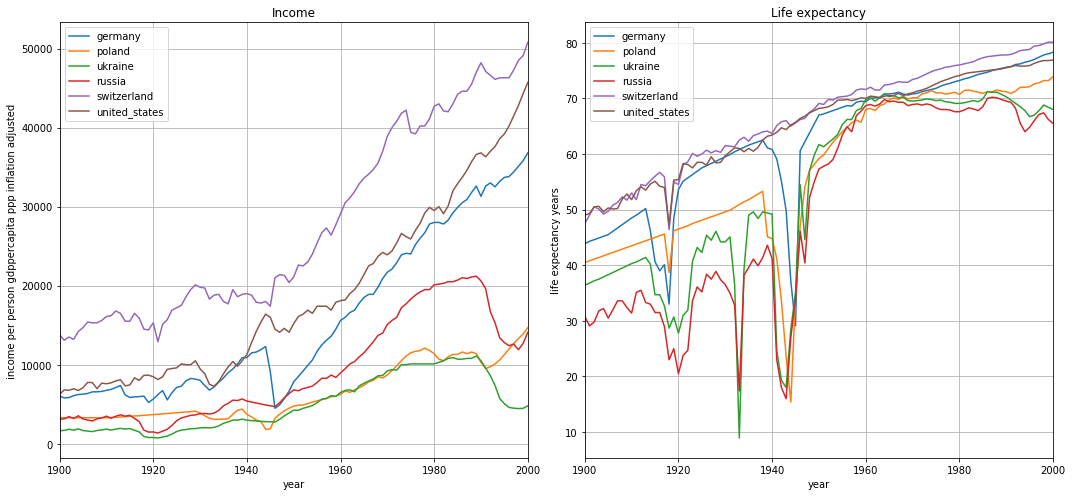

In [64]:
_plot_overview(final_df)

### Looking at the plots some conclusions can be drawn directly:

* The first (1914-1918) and second (1939-1945) World War had a severe impact on the *life expectancy*.
* But remarkably, even worse then World War II on *life expectency* was the so called [Holodomor](https://en.wikipedia.org/wiki/Holodomor) in 1932-1933 in the Soviet Union, here represented by Ukraine and Russia.
* The relative increas of *life expectancy* was quite similar for all countries.
* The end of the soviet union decreased the *income* of the former soviet states to the level of the 1960s.

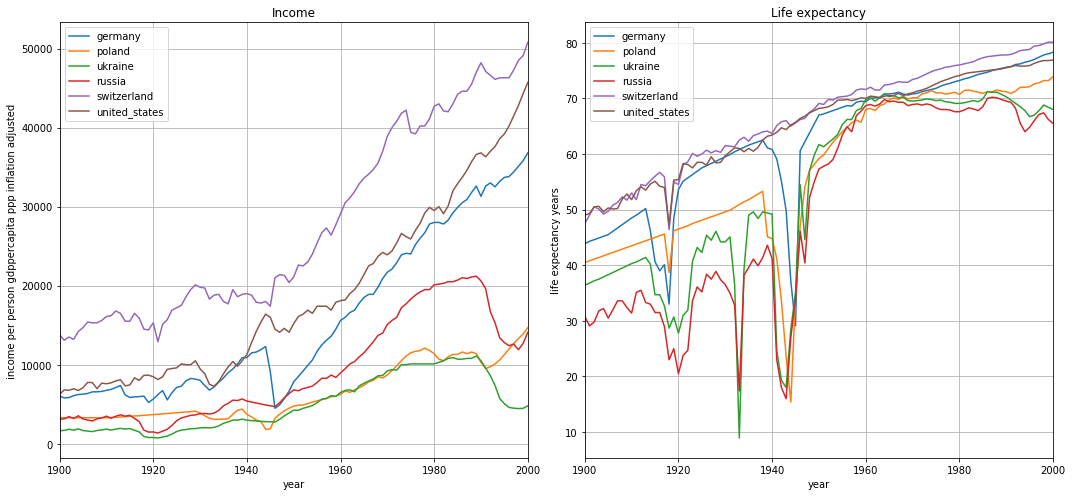

In [65]:
_plot_overview(final_df)

### Further Investigations

* Is there a correlation between *income* and *life expectancy*?
* Which Country had the biggest relative increase in *income*?

### Is there a correlation between income and life expectancy?

In [70]:
def _create_life_expectency_plots(final_df):
    income_df = final_df['income']
    life_df = final_df['life_expectancy']

    _, ax = plt.subplots(figsize=(15,8));
    for idx, column in enumerate(income_df.columns):
        title = column[0].upper() + column[1:].replace('_', ' ')
        ax.scatter(income_df[column], life_df[column], label=title, marker='x');

    ax.set_title('Life expectency over income for the last 100 years')
    ax.set_ylabel('Life expectency over the last 100 years [y]');
    ax.set_xlabel('Income over the last 100 years [PPP]');
    ax.grid(True);
    ax.set_xlim((0, 52000));
    plt.legend();

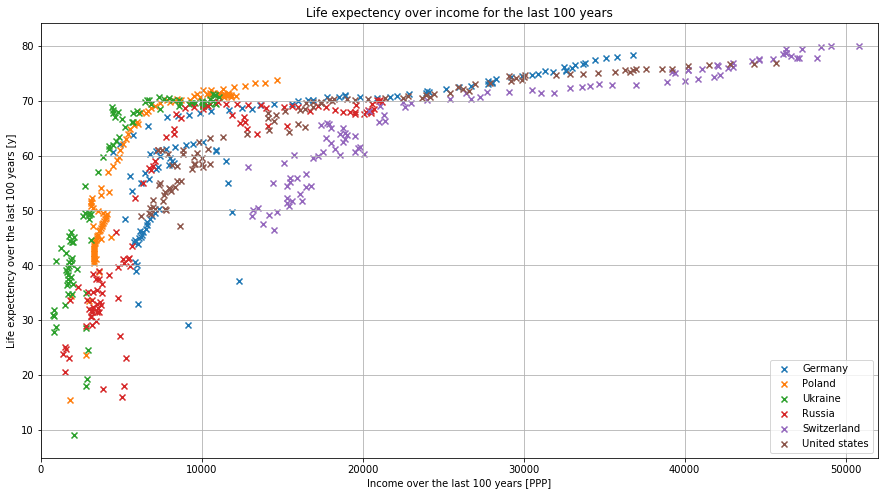

In [71]:
_create_life_expectency_plots(final_df)

### Correlations in life expectancy to income

There seems to be a quite a steep correlation in the lower incomes and a flat correlation in the higher income rates. The exception is Germany, which seems to not have a correlation in lower income to the life expectancy. 

* The lower incomes all originate from the beginning of the century, so there the are influence from worse available medicine and the World Wars.
* The correlations of income to life expectancy are not that strong in the former Soviet Union States.
* Data only support a correlation for higher income, which also was generated in the second half of the century. 
* Here a further investigation is adviced.

### Which Country had the biggest relative increase in income between 1900 and 2000?

To answer that question two bar chars with relative and absolute incomes are created. The bar colors represent the incomes in:

* 1900 the beginning of the last century
* 1969 the year of the Appollo 11 mission
* 1989 the end of the Soviet Union
* 2000 the end of the last millenium.

In [61]:
# The next functions are quite long, therefore a private
# method is defined to make the upcoming slides more organized. 

def _create_income_plots(final_df):
    # Get some years of income data
    income_1900 = final_df['income'].loc[1900]
    income_1969 = final_df['income'].loc[1969]
    income_1989 = final_df['income'].loc[1989]
    income_2000 = final_df['income'].loc[2000]

    # The absolute increase is the difference since the start point
    abs_income_1900 = income_1900 - income_1900
    abs_income_1969 = income_1969 - income_1900
    abs_income_1989 = income_1989 - income_1900
    abs_income_2000 = income_2000 - income_1900

    # The relative increase is the increase devided by the start point
    rel_income_1900 = income_1900 / income_1900 * 100
    rel_income_1969 = income_1969 / income_1900 * 100
    rel_income_1989 = income_1989 / income_1900 * 100
    rel_income_2000 = income_2000 / income_1900 * 100

    nice_strings = lambda x:  x[0].upper() + x[1:].replace('_', ' ')
    xlabels = list(map(nice_strings, income_1900.index))
    xticks = np.arange(len(xlabels))

    _, ax = plt.subplots(1, 3, figsize=(15, 5));

    
    ax[0].bar(xticks-0.3, income_1900.values, width=0.2, label='1900');
    ax[0].bar(xticks-0.1, income_1969.values, width=0.2, label='1969');
    ax[0].bar(xticks+0.1, income_1989.values, width=0.2, label='1989');
    ax[0].bar(xticks+0.3, income_2000.values, width=0.2, label='2000');

    ax[0].grid(True);
    ax[0].legend(loc='upper left');
    ax[0].set_xlabel('Country');
    ax[0].set_ylabel('Absolute purchase power parity [PPP]');
    ax[0].set_xticks(xticks);
    ax[0].set_xticklabels(xlabels, rotation=45);
    ax[0].set_title('Evolution of Income in the last Century');
    ax[0].set_ylim((0, 55000));
    
    ax[1].bar(xticks-0.3, abs_income_1900.values, width=0.2, label='1900 = 0');
    ax[1].bar(xticks-0.1, abs_income_1969.values, width=0.2, label='Δ(1969, 1900)');
    ax[1].bar(xticks+0.1, abs_income_1989.values, width=0.2, label='Δ(1989, 1900)');
    ax[1].bar(xticks+0.3, abs_income_2000.values, width=0.2, label='Δ(2000, 1900)');

    ax[1].grid(True);
    ax[1].legend(loc='upper left');
    ax[1].set_xlabel('Country');
    ax[1].set_ylabel('Absolute purchase power parity increase since 1900 [PPP]');
    ax[1].set_xticks(xticks);
    ax[1].set_xticklabels(xlabels, rotation=45);
    ax[1].set_title('Absolute income increase since 1900');
    ax[1].set_ylim((0, 45000));

    ax[2].bar(xticks-0.3, rel_income_1900.values, width=0.2, label='1900 = 100%');
    ax[2].bar(xticks-0.1, rel_income_1969.values, width=0.2, label='1969 / 1900');
    ax[2].bar(xticks+0.1, rel_income_1989.values, width=0.2, label='1989 / 1900');
    ax[2].bar(xticks+0.3, rel_income_2000.values, width=0.2, label='2000 / 1900');

    ax[2].grid(True);
    ax[2].legend(loc='upper left');
    ax[2].set_xlabel('Country');
    ax[2].set_ylabel('Income in relative PPP increase [%]');
    ax[2].set_xticks(xticks);
    ax[2].set_xticklabels(xlabels, rotation=45);
    ax[2].set_title('Relative income increase since 1900');
    ax[2].set_ylim((0, 850));
    
    plt.tight_layout()

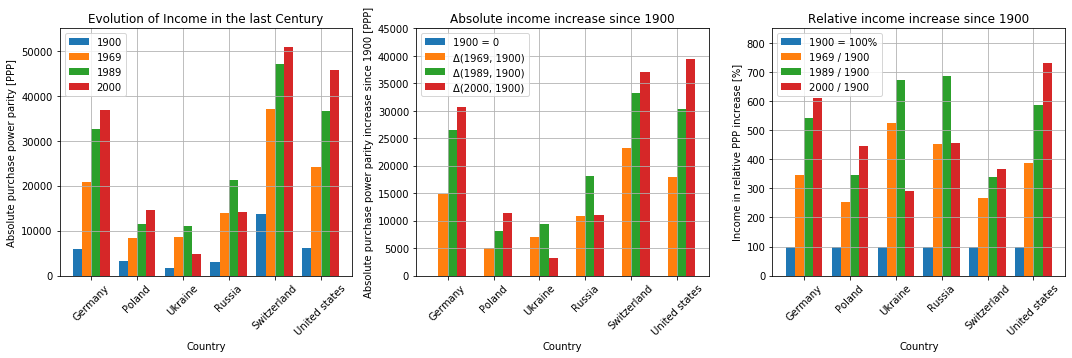

In [62]:
_create_income_plots(final_df)

### Conclusions on income between 1900 and 2000

* All countries have increased in purchase power parity per capita.
* But the increases in Russia and Ukraine were very small and decreasing in the last decate of the century
* Although Switzerland has the highest PPP per capita the biggest absolute and relative increase since 1900 is in the US.
* The relative PPP increas in the Soviet Union was the higher than in the US, but dropped to the end of the century. This is, because these countries weren't industrialized in 1900.

<a id='conclusions'></a>
## Conclusions

### Is there a correlation between *income* and *life expectancy*?

Not necessarly. There is a stronge correlation in higher income and a weak correlation in lower income, but they both need further exploration, because they can be also explained in that manner:

 * Lower income was generated in the World War periods, therefore the life expectancy was also low.
 * Higher income was also generated in the second half of the last century, which came with a massive development in medicine and science.
 
### Which Country had the biggest increase in *income* over the last century?

* The highest *income* from the evaluated 6 countries hast Switzerland
* But considering the question which country had the highest increase in the last centruy, under both metrics, the  absolute income increase and realative income increase it is the United States.
